In [1]:
#|export
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)/'images'

In [3]:
#|export
def is_cat(x):
    return x[0].isupper()

## Test

In [4]:
dls = ImageDataLoaders.from_name_func(
    '.',
    get_image_files(path),
    label_func=is_cat,
    item_tfms=Resize(192)
)

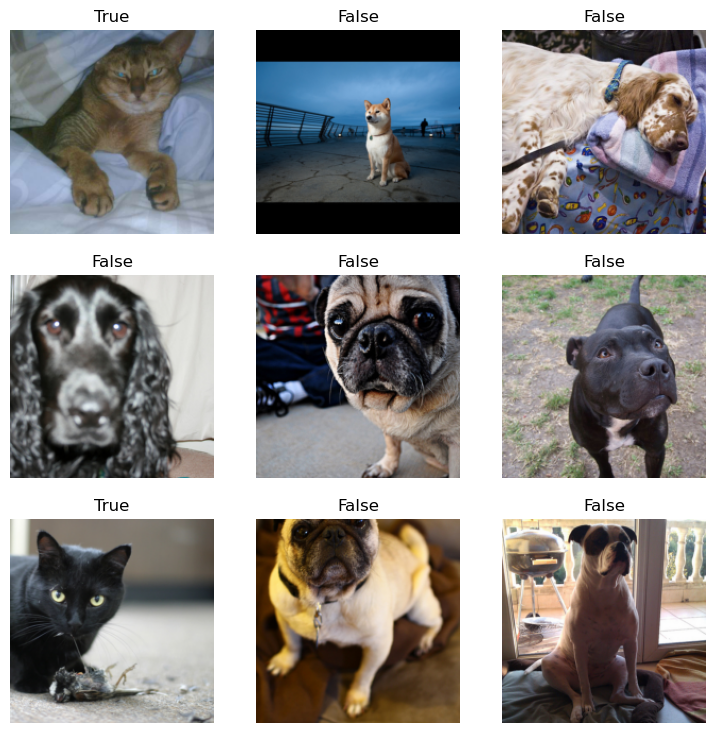

In [5]:
dls.show_batch()

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
learn.export('model.pkl')

In [8]:
#| export
ml = load_learner('model.pkl')

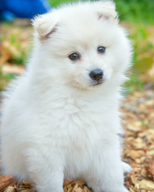

In [9]:
#|export
img = PILImage.create('dog.jpg')
img.thumbnail((192, 192))
img

In [10]:
#|export
ml.predict(img)

('False', tensor(0), tensor([9.9983e-01, 1.7029e-04]))

In [14]:
#|export

categories = ('Dog', 'Cat')

def classify_image(img):
    pred, _, prob = ml.predict(img)
    return dict(zip(categories, map(float, prob)))

In [12]:
classify_image(img)

{'Cat': 0.9998296499252319, 'Dog': 0.00017029355512931943}

In [15]:
#|export
import gradio as gr

image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = ['dog.jpg']

intf = gr.Interface(
    fn=classify_image,
    inputs=image,
    outputs=label,
    examples=examples,
)
intf.launch(inline=False)


/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/yiouli/anaconda3/envs/ml/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.
